### The purpose of this notebook is to get a very rough estimate of the magnetic field path length of the quasar through the cluster, with many assumptions and simplifications

In [30]:
import numpy as np

from astropy.table import Table # data stuffs

from scipy.integrate import quad # for integrating

import astropy.units as u # units for conversion and stuff
import matplotlib.pyplot as plt # plots

# Load Data from Flux Comparision notebook

In [31]:
quasars_matched = Table.read("../Products/Tables/QCP_matches_reduced.csv")
print(f"{len(quasars_matched)} Quasars-Cluster pairs with reasonable flux values etc")
quasars_matched[:3]

44 Quasars-Cluster pairs with reasonable flux values etc


IAUNAME,UID,RA,DEC,RADEC_ERR,EXT,ML_FLUX_1,QUAIA_source_id,QUAIA_redshift,QUAIA_redshift_err,CLUSTER_NAME,SEPARATION,CLUSTER_Z,CLUSTER_FLUX,CLUSTER_R500,SEPARATION_R
str23,int64,float64,float64,float64,float64,float64,int64,float64,float64,str23,float64,float64,float64,float64,float64
1eRASS J034542.8-512950,105814100004,56.428536351919384,-51.49737416405309,0.8932768702507019,0.0,1.2494709043450736e-12,4829294973181982976,0.396,0.07660170276641848,1eRASS J034542.1-513042,0.014563502373970234,0.1939,2.4678e-13,891.0,174.39308805364402
1eRASS J043829.2-614758,107315300001,69.62171465309667,-61.79967048220355,0.3404570519924164,0.0,4.316204078175234e-12,4677239112130585984,1.927,0.7133141228485108,1eRASS J043838.1-615107,0.055282362612759095,0.0659,2.3504000000000003e-13,598.0,260.20071499975273
1eRASS J045957.6-611510,107715000001,74.99019789325905,-61.25294175144008,0.35830843448638916,0.0,2.8914154057146924e-12,4761465310590509056,0.16512604357212446,0.09792351691246033,1eRASS J045949.0-611349,0.028276261080173008,0.093,5.5426e-13,798.0,181.95463926000983


# Calculate Path Length
Loop through Quasar-Cluster Pairs (QCPs) and calculate the estimated path length.<br>

This involve the integral
$$ L = \int^\frac{\pi}{2}_0 \left(1 + \frac{R}{R_0 \cos \theta}\right)^{-1.5} d\theta$$

Where $R$ is the separation of the Quasar from the Cluster, and $R_0$ will be the $R_{500}$ value of the cluster <br>
I will then normalize them so that the QCP with maximum and best path length is 1

In [32]:
def path_length_integrand(theta, R, R_0):
    return np.power(1+(R/(R_0 * np.cos(theta))), -1.5)
    
quasars_matched["PATH_LEN"] = np.zeros(len(quasars_matched))
for quasar in quasars_matched:
    integrand = lambda theta : path_length_integrand(theta, quasar["SEPARATION_R"], quasar["CLUSTER_R500"])
    quasar["PATH_LEN"] = quad(integrand, 0, np.pi/2)[0]


quasars_matched["PATH_LEN"] = quasars_matched["PATH_LEN"]/max(quasars_matched["PATH_LEN"])
quasars_matched

IAUNAME,UID,RA,DEC,RADEC_ERR,EXT,ML_FLUX_1,QUAIA_source_id,QUAIA_redshift,QUAIA_redshift_err,CLUSTER_NAME,SEPARATION,CLUSTER_Z,CLUSTER_FLUX,CLUSTER_R500,SEPARATION_R,PATH_LEN
str23,int64,float64,float64,float64,float64,float64,int64,float64,float64,str23,float64,float64,float64,float64,float64,float64
1eRASS J034542.8-512950,105814100004,56.428536351919384,-51.49737416405309,0.8932768702507019,0.0,1.2494709043450736e-12,4829294973181982976,0.396,0.07660170276641848,1eRASS J034542.1-513042,0.014563502373970234,0.1939,2.4678e-13,891.0,174.39308805364402,0.8147990171858014
1eRASS J043829.2-614758,107315300001,69.62171465309667,-61.79967048220355,0.3404570519924164,0.0,4.316204078175234e-12,4677239112130585984,1.927,0.7133141228485108,1eRASS J043838.1-615107,0.055282362612759095,0.0659,2.3504000000000003e-13,598.0,260.20071499975273,0.5634078942133781
1eRASS J045957.6-611510,107715000001,74.99019789325905,-61.25294175144008,0.35830843448638916,0.0,2.8914154057146924e-12,4761465310590509056,0.16512604357212446,0.09792351691246033,1eRASS J045949.0-611349,0.028276261080173008,0.093,5.5426e-13,798.0,181.95463926000983,0.7693666776261807
1eRASS J051621.0-103341,107810200002,79.08789664207139,-10.561521945751187,0.6047040820121765,0.0,3.5063143794672458e-12,2990073016486189056,0.3115370273590088,0.16922684105873104,1eRASS J051626.6-103259,0.025458278986997852,0.1155,7.309000000000001e-14,597.0,198.24560383386685,0.6511929784990997
1eRASS J060241.8-595152,108915000003,90.67454848061813,-59.86446695258894,0.7766640782356262,0.0,5.784297736968758e-13,5494423607324927872,0.1011425331234932,0.05274107449054718,1eRASS J060232.1-595106,0.02398260881687685,0.0947,3.1304e-13,719.0,156.83681151563093,0.782734972705353
1eRASS J062307.4-643619,109315600002,95.78120338450204,-64.6054644793165,0.8028334975242615,0.0,3.175580891995322e-12,5476948725428677376,0.16680968912865757,0.14097615360975266,1eRASS J062238.2-643200,0.0889746292682517,0.0432,1.6035e-13,473.0,282.04050370109724,0.4622617983797409
1eRASS J234931.6-363458,135812600026,357.38179902077394,-36.58289509104878,2.9871714115142822,0.0,2.147584004076955e-13,2310821636519890432,0.5941154360771179,0.12225273481365201,1eRASS J234950.8-363449,0.06432233043857426,0.0456,6.855000000000001e-14,322.0,214.605253835957,0.42768212730100663
1eRASS J023010.7-141748,103810500065,37.54469911739319,-14.296729798518534,2.7968251705169678,0.0,1.4456018576202573e-13,5146274760900681344,1.8980954885482788,0.4301327623748781,1eRASS J023027.9-141831,0.07056602419214664,0.0553,4.1423e-13,598.0,282.2351220697467,0.5370220101070355
1eRASS J025357.6-524617,104214400047,43.490325746325176,-52.771517408986256,2.303354024887085,0.0,1.9837899226972378e-13,4747167188367506560,1.2826241254806519,0.16702477931976312,1eRASS J025349.0-524830,0.043006749747826326,0.0568,5.2140000000000006e-14,328.0,176.36045795229754,0.4950562425608926


### Going to plot them to try and visualise

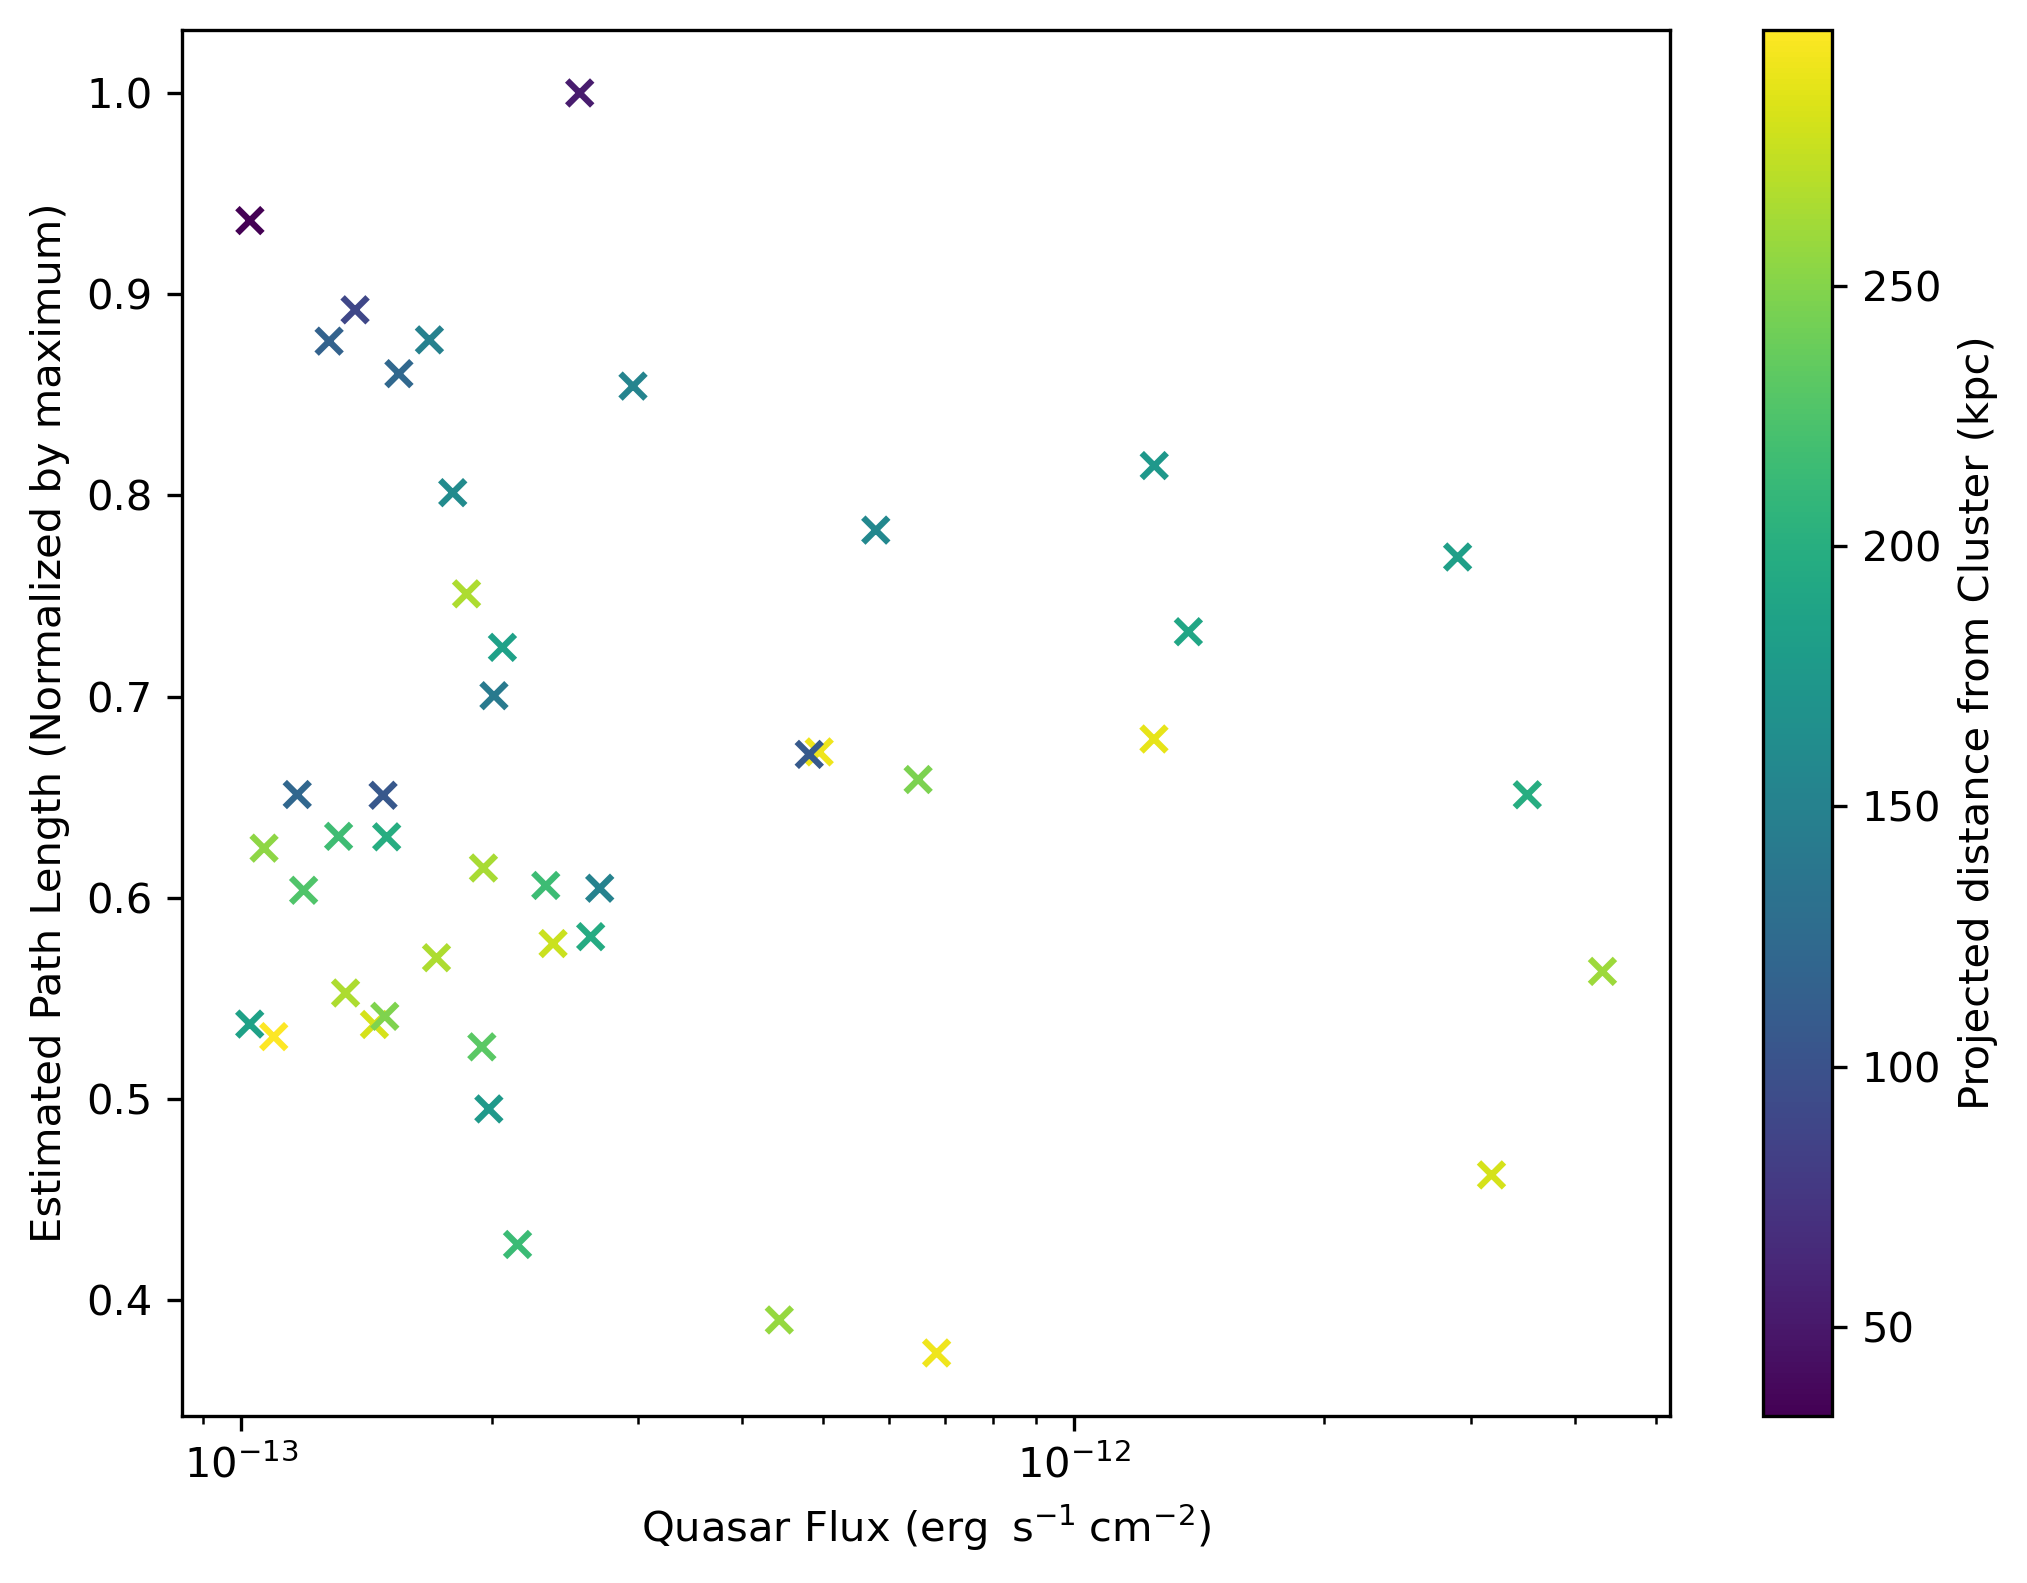

In [33]:
plt.figure(dpi = 300, figsize = (8,6))

plt.scatter(quasars_matched["ML_FLUX_1"], quasars_matched["PATH_LEN"], marker='x', c=quasars_matched["SEPARATION_R"])
plt.colorbar(label="Projected distance from Cluster (kpc)")
plt.xscale("log")
plt.ylabel("Estimated Path Length (Normalized by maximum)")
plt.xlabel(r"Quasar Flux ($\rm{erg} \;\; \rm{s}^{-1} \; \rm{cm}^{-2}$)")

plt.show()